# Caso Berka Preparacion de datos

In [0]:
%sql
SELECT * FROM default.account
LIMIT 10;


account_id,district_id,frequency,date
576,55,POPLATEK MESICNE,930101
3818,74,POPLATEK MESICNE,930101
704,55,POPLATEK MESICNE,930101
2378,16,POPLATEK MESICNE,930101
2632,24,POPLATEK MESICNE,930102
1972,77,POPLATEK MESICNE,930102
1539,1,POPLATEK PO OBRATU,930103
793,47,POPLATEK MESICNE,930103
2484,74,POPLATEK MESICNE,930103
1695,76,POPLATEK MESICNE,930103


In [0]:
%sql
CREATE TABLE IF NOT EXISTS candidatos_creditosss AS
SELECT
  cl.client_id,
  cl.district_id,
  lo.loan_id,
  lo.date AS date_loan,
  -- Fecha de concesión del préstamo
  lo.amount AS loan_amount,
  lo.duration AS loan_duration,
  lo.payments AS loan_payments,
  lo.status AS loan_status,
  CASE
    WHEN lo.status IN ('A', 'C') THEN 1
    ELSE 0
  END AS buen_candidato,
  ac.account_id,
  ac.frequency AS account_frequency,
  ac.date AS date_ac,
  -- Fecha de creación de la cuenta
  di.disp_id,
  di.type
FROM
  client cl
  JOIN disp di ON cl.client_id = di.client_id
  JOIN account ac ON di.account_id = ac.account_id
  JOIN loan lo ON ac.account_id = lo.account_id;

num_affected_rows,num_inserted_rows


In [0]:
%sql
describe candidatos_creditosss;

col_name,data_type,comment
client_id,int,null
district_id,int,null
loan_id,int,null
date_loan,int,null
loan_amount,int,null
loan_duration,int,null
loan_payments,double,null
loan_status,string,null
buen_candidato,int,null
account_id,int,null


In [0]:
%sql
SELECT * FROM candidatos_creditosss LIMIT 100;

client_id,district_id,loan_id,date_loan,loan_amount,loan_duration,loan_payments,loan_status,buen_candidato,account_id,account_frequency,date_ac,disp_id,type
2,1,4959,940105,80952,24,3373.0,A,1,2,POPLATEK MESICNE,930226,2,OWNER
3,1,4959,940105,80952,24,3373.0,A,1,2,POPLATEK MESICNE,930226,3,DISPONENT
25,21,4961,960429,30276,12,2523.0,B,0,19,POPLATEK MESICNE,950407,25,OWNER
31,68,4962,971208,30276,12,2523.0,A,1,25,POPLATEK MESICNE,960728,31,OWNER
45,20,4967,981014,318480,60,5308.0,D,0,37,POPLATEK MESICNE,970818,45,OWNER
46,19,4968,980419,110736,48,2307.0,C,1,38,POPLATEK TYDNE,970808,46,OWNER
78,16,4973,960502,165960,24,6915.0,A,1,67,POPLATEK MESICNE,941019,78,OWNER
116,74,4986,970810,102876,12,8573.0,A,1,97,POPLATEK MESICNE,960505,116,OWNER
117,74,4986,970810,102876,12,8573.0,A,1,97,POPLATEK MESICNE,960505,117,DISPONENT
124,44,4988,971206,265320,36,7370.0,D,0,103,POPLATEK MESICNE,960310,124,OWNER


In [0]:
# Cargar la tabla como un DataFrame
df = spark.sql("SELECT * FROM default.candidatos_creditosss")

# Mostrar las primeras filas
df.show(5)


+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+---------+
|client_id|district_id|loan_id|date_loan|loan_amount|loan_duration|loan_payments|loan_status|buen_candidato|account_id|account_frequency|date_ac|disp_id|     type|
+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+---------+
|        2|          1|   4959|   940105|      80952|           24|       3373.0|          A|             1|         2| POPLATEK MESICNE| 930226|      2|    OWNER|
|        3|          1|   4959|   940105|      80952|           24|       3373.0|          A|             1|         2| POPLATEK MESICNE| 930226|      3|DISPONENT|
|       25|         21|   4961|   960429|      30276|           12|       2523.0|          B|             0|        19| POPLATEK MESICNE| 950407|     25|    OWNER|
|       31|     

In [0]:
from pyspark.sql.functions import col, count, when

# Contar valores nulos o vacíos por columna
df.select([count(when(col(c).isNull() | (col(c) == ''), c)).alias(c) for c in df.columns]).show()


+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+----+
|client_id|district_id|loan_id|date_loan|loan_amount|loan_duration|loan_payments|loan_status|buen_candidato|account_id|account_frequency|date_ac|disp_id|type|
+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+----+
|        0|          0|      0|        0|          0|            0|            0|          0|             0|         0|                0|      0|      0|   0|
+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+----+



In [0]:
df.show(5);

+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+---------+
|client_id|district_id|loan_id|date_loan|loan_amount|loan_duration|loan_payments|loan_status|buen_candidato|account_id|account_frequency|date_ac|disp_id|     type|
+---------+-----------+-------+---------+-----------+-------------+-------------+-----------+--------------+----------+-----------------+-------+-------+---------+
|        2|          1|   4959|   940105|      80952|           24|       3373.0|          A|             1|         2| POPLATEK MESICNE| 930226|      2|    OWNER|
|        3|          1|   4959|   940105|      80952|           24|       3373.0|          A|             1|         2| POPLATEK MESICNE| 930226|      3|DISPONENT|
|       25|         21|   4961|   960429|      30276|           12|       2523.0|          B|             0|        19| POPLATEK MESICNE| 950407|     25|    OWNER|
|       31|     

## **Analisis** univariado

In [0]:
%sql
describe account

col_name,data_type,comment
account_id,int,null
district_id,int,null
frequency,string,null
date,int,null


In [0]:
%sql
describe client

col_name,data_type,comment
client_id,int,null
birth_number,int,null
district_id,int,null


In [0]:
%sql
describe disp

col_name,data_type,comment
disp_id,int,null
client_id,int,null
account_id,int,null
type,string,null


In [0]:
%sql
describe loan

col_name,data_type,comment
loan_id,int,null
account_id,int,null
date,int,null
amount,int,null
duration,int,null
payments,double,null
status,string,null


### media , moda , mediana

In [0]:
from pyspark.sql import functions as F
# variables de interes
columns_of_interest = ['date_loan','date_ac', 'loan_amount', 'loan_duration', 'loan_payments']
# Crear una lista para almacenar resultados
stats_results = []
# Iterar sobre cada columna de interés
for column in columns_of_interest:
    # Calcular estadísticas (media, mediana y moda) si existe en el DataFrame
    if column in df.columns:
        mean_value = df.agg(F.mean(column).alias("mean")).collect()[0]["mean"]
        median_value = (
            df.approxQuantile(column, [0.5], 0.01)[0]  # Mediana usando percentil
        )
        mode_value = (
            df.groupBy(column).count()
            .orderBy(F.desc("count"))
            .first()[0]  # Ordenar por frecuencia para obtener la moda
        )
        # Guardar los resultados para la columna
        stats_results.append(
            {
                "Column": column,
                "Mean": mean_value,
                "Median": median_value,
                "Mode": mode_value,
            }
        )
    else:
        print(f"La columna '{column}' no se encuentra en el DataFrame.")
# resultados
for result in stats_results:
    print(
        f"Columna: {result['Column']} - Media: {result['Mean']}, "
        f"Mediana: {result['Median']}, Moda: {result['Mode']}"
    )


Columna: date_loan - Media: 962950.1644498187, Mediana: 970121.0, Moda: 951212
Columna: date_ac - Media: 952186.3966142684, Mediana: 960119.0, Moda: 951109
Columna: loan_amount - Media: 151801.53808948005, Mediana: 113436.0, Moda: 192744
Columna: loan_duration - Media: 36.26118500604595, Mediana: 36.0, Moda: 60
Columna: loan_payments - Media: 4231.251511487303, Mediana: 3883.0, Moda: 7370.0


### Mediadas de dispersion 

In [0]:
from pyspark.sql import functions as F

# Lista de columnas de interés
medidas_dispersion = ['date_ac', 'date_loan', 'loan_amount', 'loan_duration', 'loan_payments']

for column in medidas_dispersion:
    if column in df.columns:
        # Calcular métricas para la columna
        max_value = df.agg(F.max(column).alias("max")).collect()[0]["max"]
        min_value = df.agg(F.min(column).alias("min")).collect()[0]["min"]
        rango = max_value - min_value
        
        # Percentiles usando approxQuantile
        percentiles = df.approxQuantile(column, [0.25, 0.50, 0.75], 0.01)
        q1, q2, q3 = percentiles
        
        # Varianza y desviación estándar
        varianza = df.agg(F.variance(column).alias("variance")).collect()[0]["variance"]
        desv_est = df.agg(F.stddev(column).alias("stddev")).collect()[0]["stddev"]
        
        # Imprimir resultados
        print(f"De '{column}':")
        print(f"- Máximo: {max_value}")
        print(f"- Mínimo: {min_value}")
        print(f"- Rango: {rango}")
        print(f"- Percentil 25 (Q1): {q1}")
        print(f"- Percentil 50 (Q2/Mediana): {q2}")
        print(f"- Percentil 75 (Q3): {q3}")
        print(f"- Varianza: {varianza}")
        print(f"- Desviación estándar: {desv_est}")
        print("________________________")
    else:
        print(f"La columna '{column}' no se encuentra en el DataFrame.")


De 'date_ac':
- Máximo: 971222
- Mínimo: 930113
- Rango: 41109
- Percentil 25 (Q1): 940522.0
- Percentil 50 (Q2/Mediana): 960119.0
- Percentil 75 (Q3): 961011.0
- Varianza: 200034534.39940646
- Desviación estándar: 14143.35654642866
________________________
De 'date_loan':
- Máximo: 981208
- Mínimo: 930705
- Rango: 50503
- Percentil 25 (Q1): 950703.0
- Percentil 50 (Q2/Mediana): 970121.0
- Percentil 75 (Q3): 971208.0
- Varianza: 211585443.3845452
- Desviación estándar: 14545.976879692378
________________________
De 'loan_amount':
- Máximo: 590820
- Mínimo: 4980
- Rango: 585840
- Percentil 25 (Q1): 67464.0
- Percentil 50 (Q2/Mediana): 113436.0
- Percentil 75 (Q3): 208320.0
- Varianza: 13127898518.658035
- Desviación estándar: 114577.04184808594
________________________
De 'loan_duration':
- Máximo: 60
- Mínimo: 12
- Rango: 48
- Percentil 25 (Q1): 24.0
- Percentil 50 (Q2/Mediana): 36.0
- Percentil 75 (Q3): 48.0
- Varianza: 294.9050654221477
- Desviación estándar: 17.172800162528755
_____

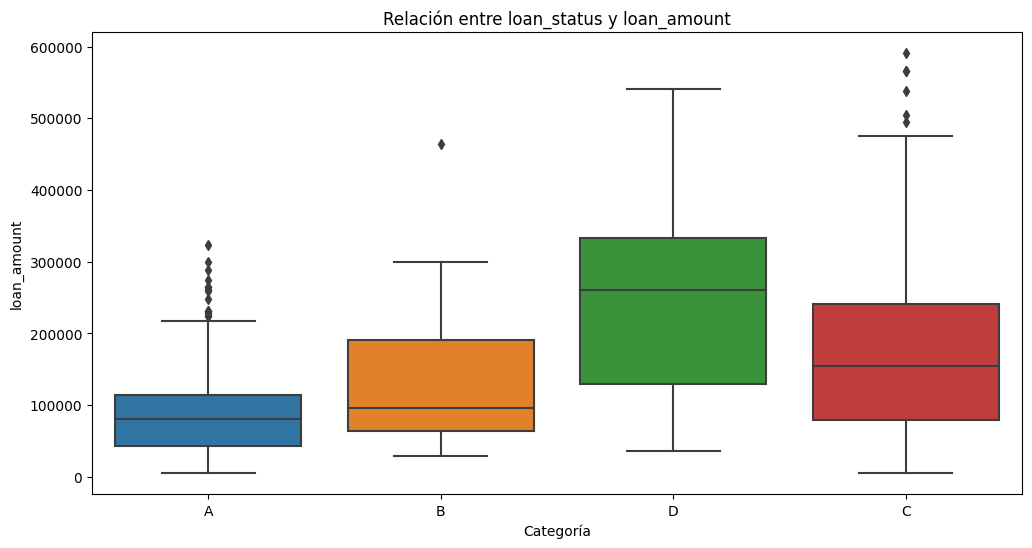

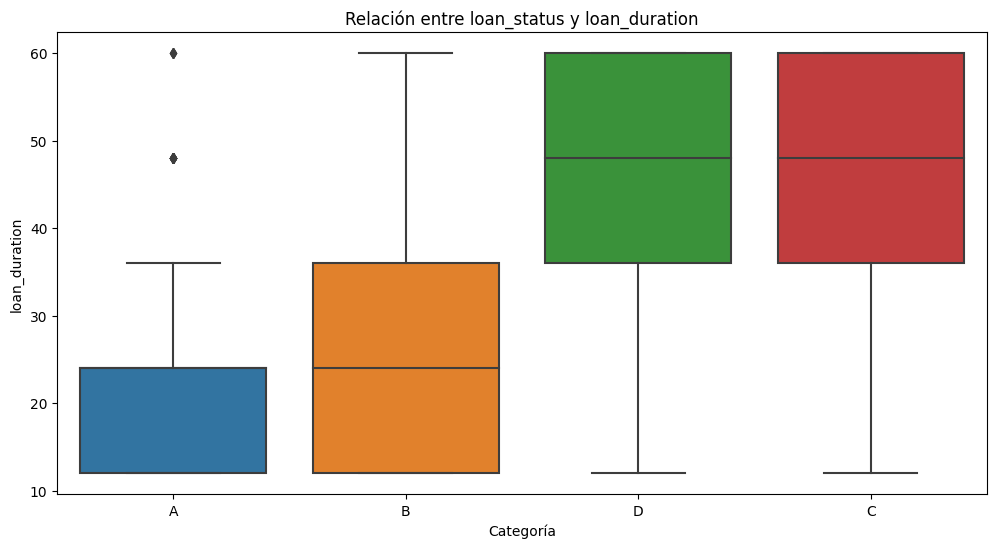

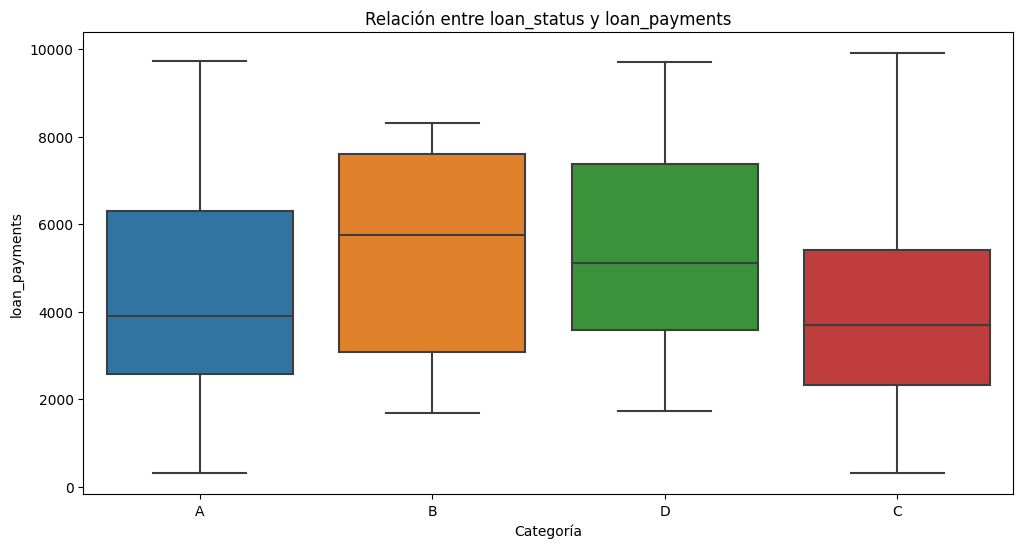

In [0]:
from pyspark.sql import functions as F

# variables cuantitativas y categóricas
variables_cuantitativas = ['loan_amount', 'loan_duration', 'loan_payments']
categoria = 'loan_status'
columns_to_analyze = [var for var in variables_cuantitativas if var in df.columns and categoria in df.columns]
# Convertir a Pandas para la visualización
df_pandas = df.select([categoria] + columns_to_analyze).toPandas()
# Visualización con Seaborn y Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

for var in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categoria, y=var, data=df_pandas)
    plt.title(f'Relación entre {categoria} y {var}')
    plt.xlabel('Categoría')
    plt.ylabel(var)
    plt.show()


Chi-squared Test para 'loan_status' y 'account_frequency': chi2 = 3.680974957638988, p-value = 0.71975656948434


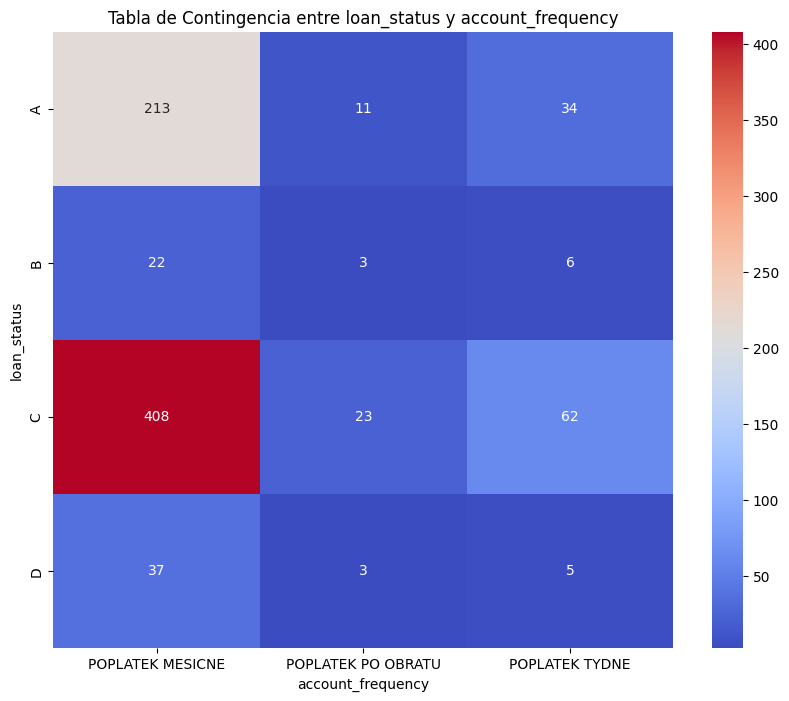

Chi-squared Test para 'loan_status' y 'type': chi2 = 18.891974147227664, p-value = 0.0002878258412030969


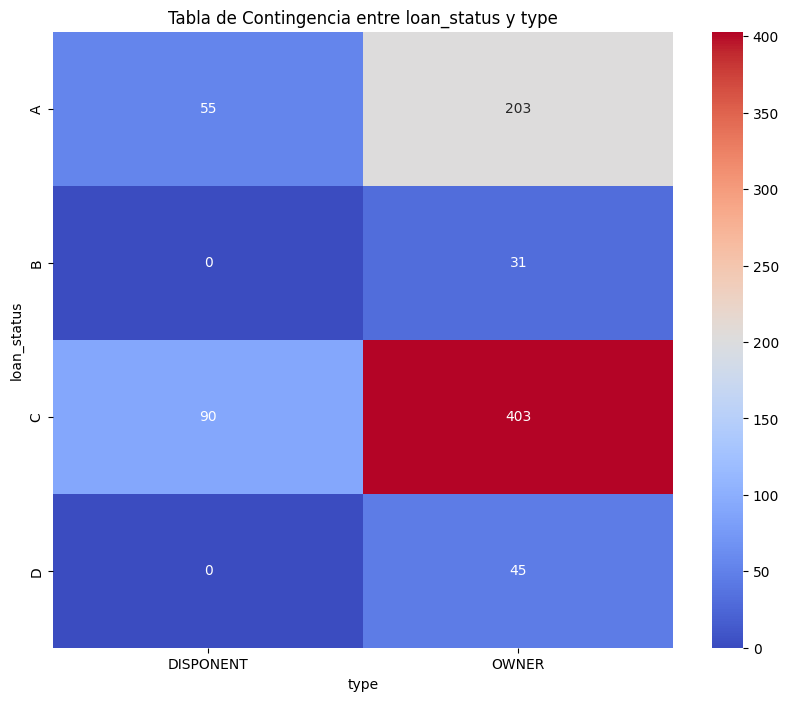

In [0]:
from pyspark.sql import functions as F
from pyspark.sql import DataFrame
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables categóricas
variables_cualitativas = ['account_frequency', 'type']
categoria = 'loan_status'

# Verificar si las columnas existen
columns_to_analyze = [var for var in variables_cualitativas if var in df.columns and categoria in df.columns]

# Convertir las columnas relevantes a Pandas
df_pandas = df.select([categoria] + columns_to_analyze).toPandas()

# Iterar por las variables cualitativas
for var in columns_to_analyze:
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df_pandas[categoria], df_pandas[var])
    
    # Realizar la prueba de Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    print(f"Chi-squared Test para '{categoria}' y '{var}': chi2 = {chi2}, p-value = {p}")
    
    # Visualizar la tabla de contingencia
    plt.figure(figsize=(10, 8))
    sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='g')
    plt.title(f'Tabla de Contingencia entre {categoria} y {var}')
    plt.ylabel(categoria)
    plt.xlabel(var)
    plt.show()
